In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import tensorflow as tf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
from time import time
from pandas import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
keras = tf.keras
register_matplotlib_converters()

C:\Users\Chandroo\AppData\Local\Temp/ipykernel_4800/1415848140.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [16]:
#define the ticker symbol
apple_ticker = 'AAPL'
apple_ticker = yf.Ticker(apple_ticker)

In [17]:
#importing the historical stock prices for this ticker
hist = apple_ticker.history(start='2015-01-01', end='2019-12-31', interval='1d')
id_1 = pd.date_range('01-01-2015', '12-31-2019')
apple_test_date_fill = hist.reindex(id_1, fill_value=np.nan)
apple_test_date_fill.ffill(inplace=True)
apple_df = apple_test_date_fill[['Close']]

## Rolling Origin Forecast Model

In [18]:
train_end = datetime(2018,12,31)
test_start = datetime(2019,11,1)
test_end = datetime(2019,12,31)

train_data = apple_df[:train_end]
test_data = apple_df[test_start:test_end]

train_data = train_data.dropna()
test_data = test_data.dropna()

rolling_predictions = pd.Series()
for end_date in test_data.index:
    train_data = apple_df[:end_date-timedelta(days=1)]
    model = ARIMA(train_data, order=(3,0,0))
    model_fit = model.fit()
    pred = model_fit.predict(end_date)
    rolling_predictions.loc[end_date] = pred.loc[end_date]

C:\Users\Chandroo\AppData\Local\Temp/ipykernel_4800/663406532.py:11: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rolling_predictions = pd.Series()
C:\Users\Chandroo\anaconda3\envs\ev_2\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Chandroo\anaconda3\envs\ev_2\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Chandroo\anaconda3\envs\ev_2\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary

C:\Users\Chandroo\anaconda3\envs\ev_2\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Chandroo\anaconda3\envs\ev_2\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Chandroo\anaconda3\envs\ev_2\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Chandroo\anaconda3\envs\ev_2\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  w

C:\Users\Chandroo\anaconda3\envs\ev_2\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Chandroo\anaconda3\envs\ev_2\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Chandroo\anaconda3\envs\ev_2\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Chandroo\anaconda3\envs\ev_2\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starti

In [19]:
residuals_rolling = test_data.Close - rolling_predictions

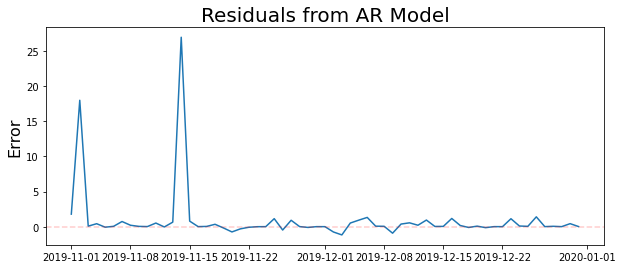

In [20]:
plt.figure(figsize=(10,4))
plt.plot(residuals_rolling)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--',alpha=0.2)

Text(0, 0.5, 'Stock')

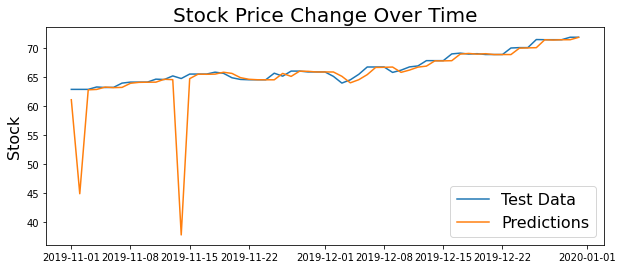

In [21]:
plt.figure(figsize=(10,4))
plt.plot(test_data)
plt.plot(rolling_predictions)
plt.legend(('Test Data','Predictions'), fontsize=16)
plt.title('Stock Price Change Over Time', fontsize=20)
plt.ylabel('Stock', fontsize=16)

In [22]:
rolling_origin_forecast_mae = keras.metrics.mean_absolute_error(test_data.Close, rolling_predictions).numpy()
rolling_origin_forecast_mae

1.105909702343608